In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Probably gonna have to analyze order profit within this data set I dont think I could find a trend for the delivery status

In [21]:
df = pd.read_csv('Cleaned_Supply_Chain.csv')

In [22]:
df.shape

(180519, 45)

In [23]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order_Profit,Order Region,Order State,Order Status,Product Category Id,Product_Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,-249.089996,South Asia,Rajastán,PENDING,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,-247.779999,South Asia,Rajastán,CLOSED,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,22.860001,Oceania,Queensland,COMPLETE,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

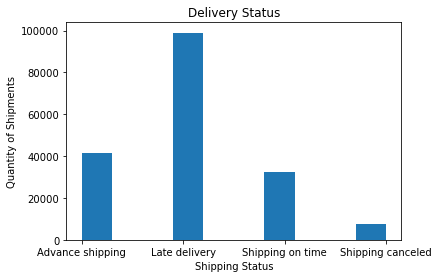

In [25]:
ax = plt.hist(df['Delivery Status'])
_ = plt.title('Delivery Status')
_ = plt.xlabel('Shipping Status')
_ = plt.ylabel('Quantity of Shipments')

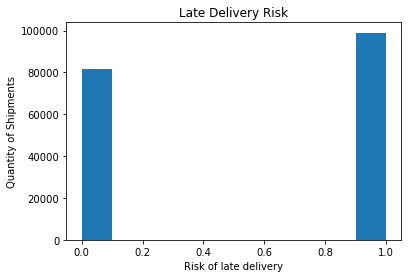

In [26]:
ax = plt.hist(df['Late_delivery_risk'])
_ = plt.title('Late Delivery Risk')
_ = plt.xlabel('Risk of late delivery')
_ = plt.ylabel('Quantity of Shipments')

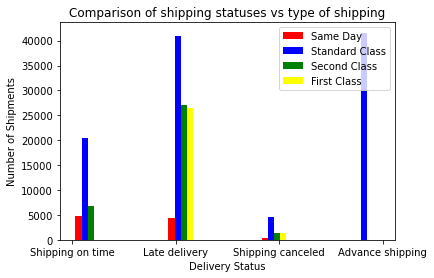

In [27]:
# Analyzing Shipping Mode with Delivery status

same_day = df[df['Shipping Mode'] == 'Same Day']
standard_class = df[df['Shipping Mode'] == 'Standard Class']
second_class = df[df['Shipping Mode'] == 'Second Class']
first_class = df[df['Shipping Mode'] == 'First Class']

same_day_result = same_day['Delivery Status']
standard_class_result = standard_class['Delivery Status']
second_class_result = second_class['Delivery Status']
first_class_result = first_class['Delivery Status']

_ = plt.hist([same_day_result, standard_class_result, second_class_result,first_class_result],
            color = ['red','blue','green','yellow'])
_ = plt.legend(['Same Day','Standard Class','Second Class','First Class'])
_ = plt.xlabel('Delivery Status')
_ = plt.ylabel('Number of Shipments')
_ = plt.title('Comparison of shipping statuses vs type of shipping')


# Every first class shipment was delayed or cancelled. No shipping type but standard had advance shipping

In [23]:
# Did certain kinds of chipments have increased average delays removing canceled shipments
#df.head()
#df2 = df[df['Delivery Status'] != 'First Class']


In [28]:
df['Delivery Difference'] =  df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

# No delays
#df3 = df2[df2['Delivery Difference'] != 0]

same_day_delay = df[df['Shipping Mode'] == 'Same Day']
standard_delay = df[df['Shipping Mode'] == 'Standard Class']
second_delay = df[df['Shipping Mode'] == 'Second Class']
first_delay = df[df['Shipping Mode'] == 'First Class']

same_day_delay_difference_mean = np.mean(same_day_delay['Delivery Difference'])
standard_delay_difference_mean = np.mean(standard_delay['Delivery Difference'])
second_delay_difference_mean = np.mean(second_delay['Delivery Difference'])
first_delay_difference_mean = np.mean(first_delay['Delivery Difference'])

print('Avg delay for same day delivery: ' , same_day_delay_difference_mean)
print('Avg delay for standard delivery: ' , standard_delay_difference_mean)
print('Avg delay for second class delivery: ' , second_delay_difference_mean)
print('Avg delay for first class delivery: ' , first_delay_difference_mean)

Avg delay for same day delivery:  0.4782787306151792
Avg delay for standard delivery:  -0.004092731457420744
Avg delay for second class delivery:  1.9908280327124035
Avg delay for first class delivery:  1.0


In [29]:
df2 = df.rename(index=str, columns={"Product Name":"Product_Name", "Order Profit Per Order":"Order_Profit"})
df2.head()
df3 = df2.groupby(df2.Product_Name).mean().reset_index()

df4 = df3.sort_values('Delivery Difference', ascending = False)

In [30]:
df4.head()


,Product_Name,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order_Profit,Product Category Id,Product Price,Product Status,Delivery Difference
76,SOLE E25 Elliptical,4.000000,3.000000,-16.956000,941.489990,0.700000,4.0,4835.700000,44997.700000,2.0,...,999.989990,-0.036000,1.0,999.989990,941.489990,-16.956000,4.0,999.989990,0.0,1.000000
60,Nike Men's Fingertrap Max Training Shoe,3.890625,2.937500,9.412187,113.388748,0.593750,2.0,5693.218750,41415.468750,2.0,...,124.989998,0.091563,1.0,124.989998,113.388748,9.412187,2.0,124.989998,0.0,0.953125
93,Titleist Club Glove Travel Cover,3.794118,2.882353,38.596176,268.181173,0.617647,35.0,6320.058824,34188.852941,6.0,...,299.989990,0.140000,1.0,299.989990,268.181173,38.596176,35.0,299.989990,0.0,0.911765
29,Garmin Approach S4 Golf GPS Watch,3.805556,2.916667,33.580556,272.531661,0.527778,38.0,6160.083333,39937.055556,6.0,...,299.989990,0.118889,1.0,299.989990,272.531661,33.580556,38.0,299.989990,0.0,0.888889
111,Yakima DoubleDown Ace Hitch Mount 4-Bike Rack,3.796875,2.984375,16.434375,168.786094,0.578125,10.0,5940.109375,46704.656250,3.0,...,189.000000,0.102656,1.0,189.000000,168.786094,16.434375,10.0,189.000000,0.0,0.812500


In [31]:
#_ = plt.plot(df4['Order_Profit'], df4['Delivery Difference'])
df4.iloc[0,:]
# How many SOLE E25's were sold

# Correlation
#col = ['Benefit per order','Order Item Total','Late_delivery_risk','Order_Profit','Delivery Difference','Order Item Discount']
#df4_feat = df4[col]

Product_Name                     SOLE E25 Elliptical
Days for shipping (real)                         4.0
Days for shipment (scheduled)                    3.0
Benefit per order                            -16.956
Sales per customer                         941.48999
Late_delivery_risk                               0.7
Category Id                                      4.0
Customer Id                                   4835.7
Customer Zipcode                             44997.7
Department Id                                    2.0
Latitude                                   25.908821
Longitude                                  -92.90909
Order Customer Id                             4835.7
Order Id                                     68812.7
Order Item Cardprod Id                          60.0
Order Item Discount                             58.5
Order Item Discount Rate                       0.059
Order Item Id                               172037.5
Order Item Product Price                   999

In [17]:
col = ['Benefit per order','Order Item Total','Late_delivery_risk','Order_Profit','Delivery Difference','Order Item Discount']
df4_feat = df4[col]

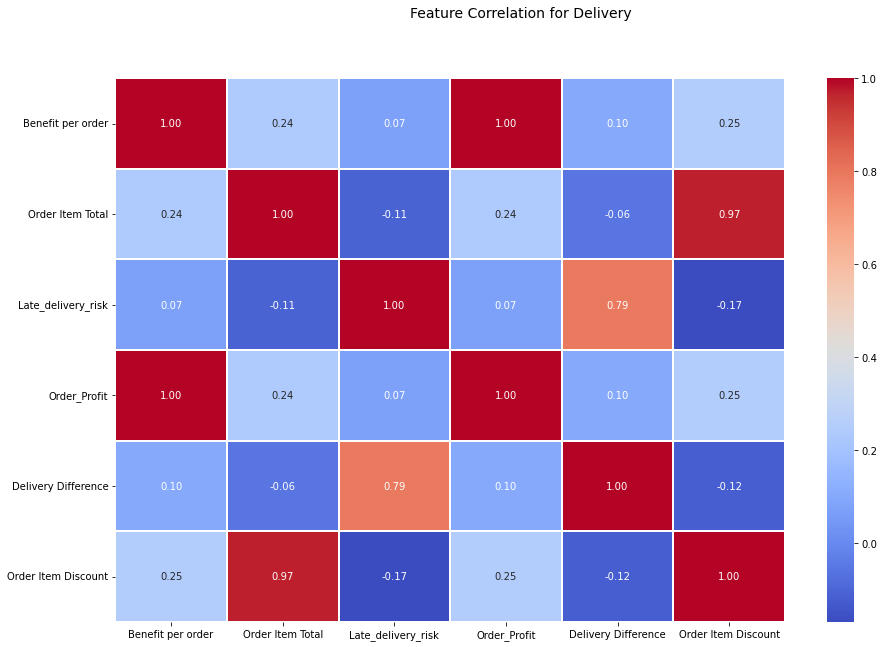

In [18]:
corr = df4_feat.corr()
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.1)
#f.subplots_adjust(top=0.93)
t= f.suptitle('Feature Correlation for Delivery', fontsize=14)

In [32]:
#plt.plot(df5['Product_Name'], df5['Days for shipping (real)'])

# What items / categories would be most at risk for late delivery
# Zipcodes


In [33]:
target = df2['Late_delivery_risk']

In [37]:
features=df2[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 
                    'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 
                    'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 
                    'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
                    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity',
                    'Order Region', 'Order State', 'Product Status', 'Shipping Mode']]
features = features.drop(columns = ['Late_delivery_risk'])